In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import lib
import myPlot
import neuron
from AP_VGCC_dynamics import AP

In [12]:
importlib.reload(myPlot)
importlib.reload(lib)
importlib.reload(neuron)
np.seterr(all='raise', under="warn")

SIMULATION_TIME = 30
TIME_STEP = 0.02e-3 #s

time_window_plot = 0, 20 #s

ap_obj = AP.Spike(
    total_width=4e-3,
    t_peak=0.5e-3,
    t_under=2e-3,
    v_thresh=-34.3e-3,
    v_rest=-65e-3,
    v_peak=40e-3,
    v_under=-74.4-3
)

properties = neuron.Properties(
    ap=ap_obj,
    membrane_tau = 20e-3,
    C = 1e-6, #F/cm^2
    t_ref_s = 2e-3, # absolute refractory period after one AP
    t_ref_v = 6.3e-3, # absolute refractory period of release vesicle machinery
    LTP_active = True,   # set to False to inactivate astrocytic feedback
    STD_active = True,
    N_v_max = 10,
    glutamate_clearance_time=2e-3
)

simulation_parameters = neuron.SimulationParameters(
    time_step = TIME_STEP,
    simulation_time = SIMULATION_TIME,
    temperature = 310, #K
    #DiffEq=False,
    current_type = "fixed_rate",
    current_amplitude = 4.5e-6,
    f_current = 500, #Hz
    N_iterations = 10
)

noise = neuron.Noise(
    thermal = False,
    axonal = False,
    AP_width_CV = 0.06,
    escape = True,
    spontaneous_release = True,
    h_init_random = False,
    VGCC = True
)

my_neuron = neuron.Simulator(properties, simulation_parameters, noise)

track_variables= ["Ca_Astro", "mutual_information", "Ca_pre", "open_prob", "release_prob", "u",
                  "N_v", "release_prob_a_posteriori", "IP3", "h"]
""" ["u", "spike_rate", "spike_probability", "open_prob", "S", "release_rate", "release_vector",
 "N_v", "release_prob", "release_prob_a_posteriori", "ap_duration_count", "Ca_pre", "Ca_Astro" ,"Ca_stored", 
 "site_probabilities", "glu", "IP3", "h", "mutual_information", "ap_active_prob", "spike_probability_a_priori", "ap_ready_prob"]"""

##results = my_neuron.simulate(track_variables, save=True, save_each=100)

#myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables))

' ["u", "spike_rate", "spike_probability", "open_prob", "S", "release_rate", "release_vector",\n "N_v", "release_prob", "release_prob_a_posteriori", "ap_duration_count", "Ca_pre", "Ca_Astro" ,"Ca_stored", \n "site_probabilities", "glu", "IP3", "h", "mutual_information", "ap_active_prob", "spike_probability_a_priori", "ap_ready_prob"]'

In [16]:
"""arr = np.zeros((2, results.N))
arr[0, :] = results.ap_duration_count.value
arr[1, :] = results.release_prob.value
print(np.cov(arr)[0,1]/np.std(results.ap_duration_count.value)/np.std(results.release_prob.value))"""
#print(np.mean(np.array(aggregate.release_prob.value), axis=1))5001, 5102
print(np.mean(aggregate.mutual_information.value, axis=1))

[0.64821262 0.61096227]


In [ ]:
# Save last figure
neuron.saveResults(simulation_parameters, properties, aggregate)

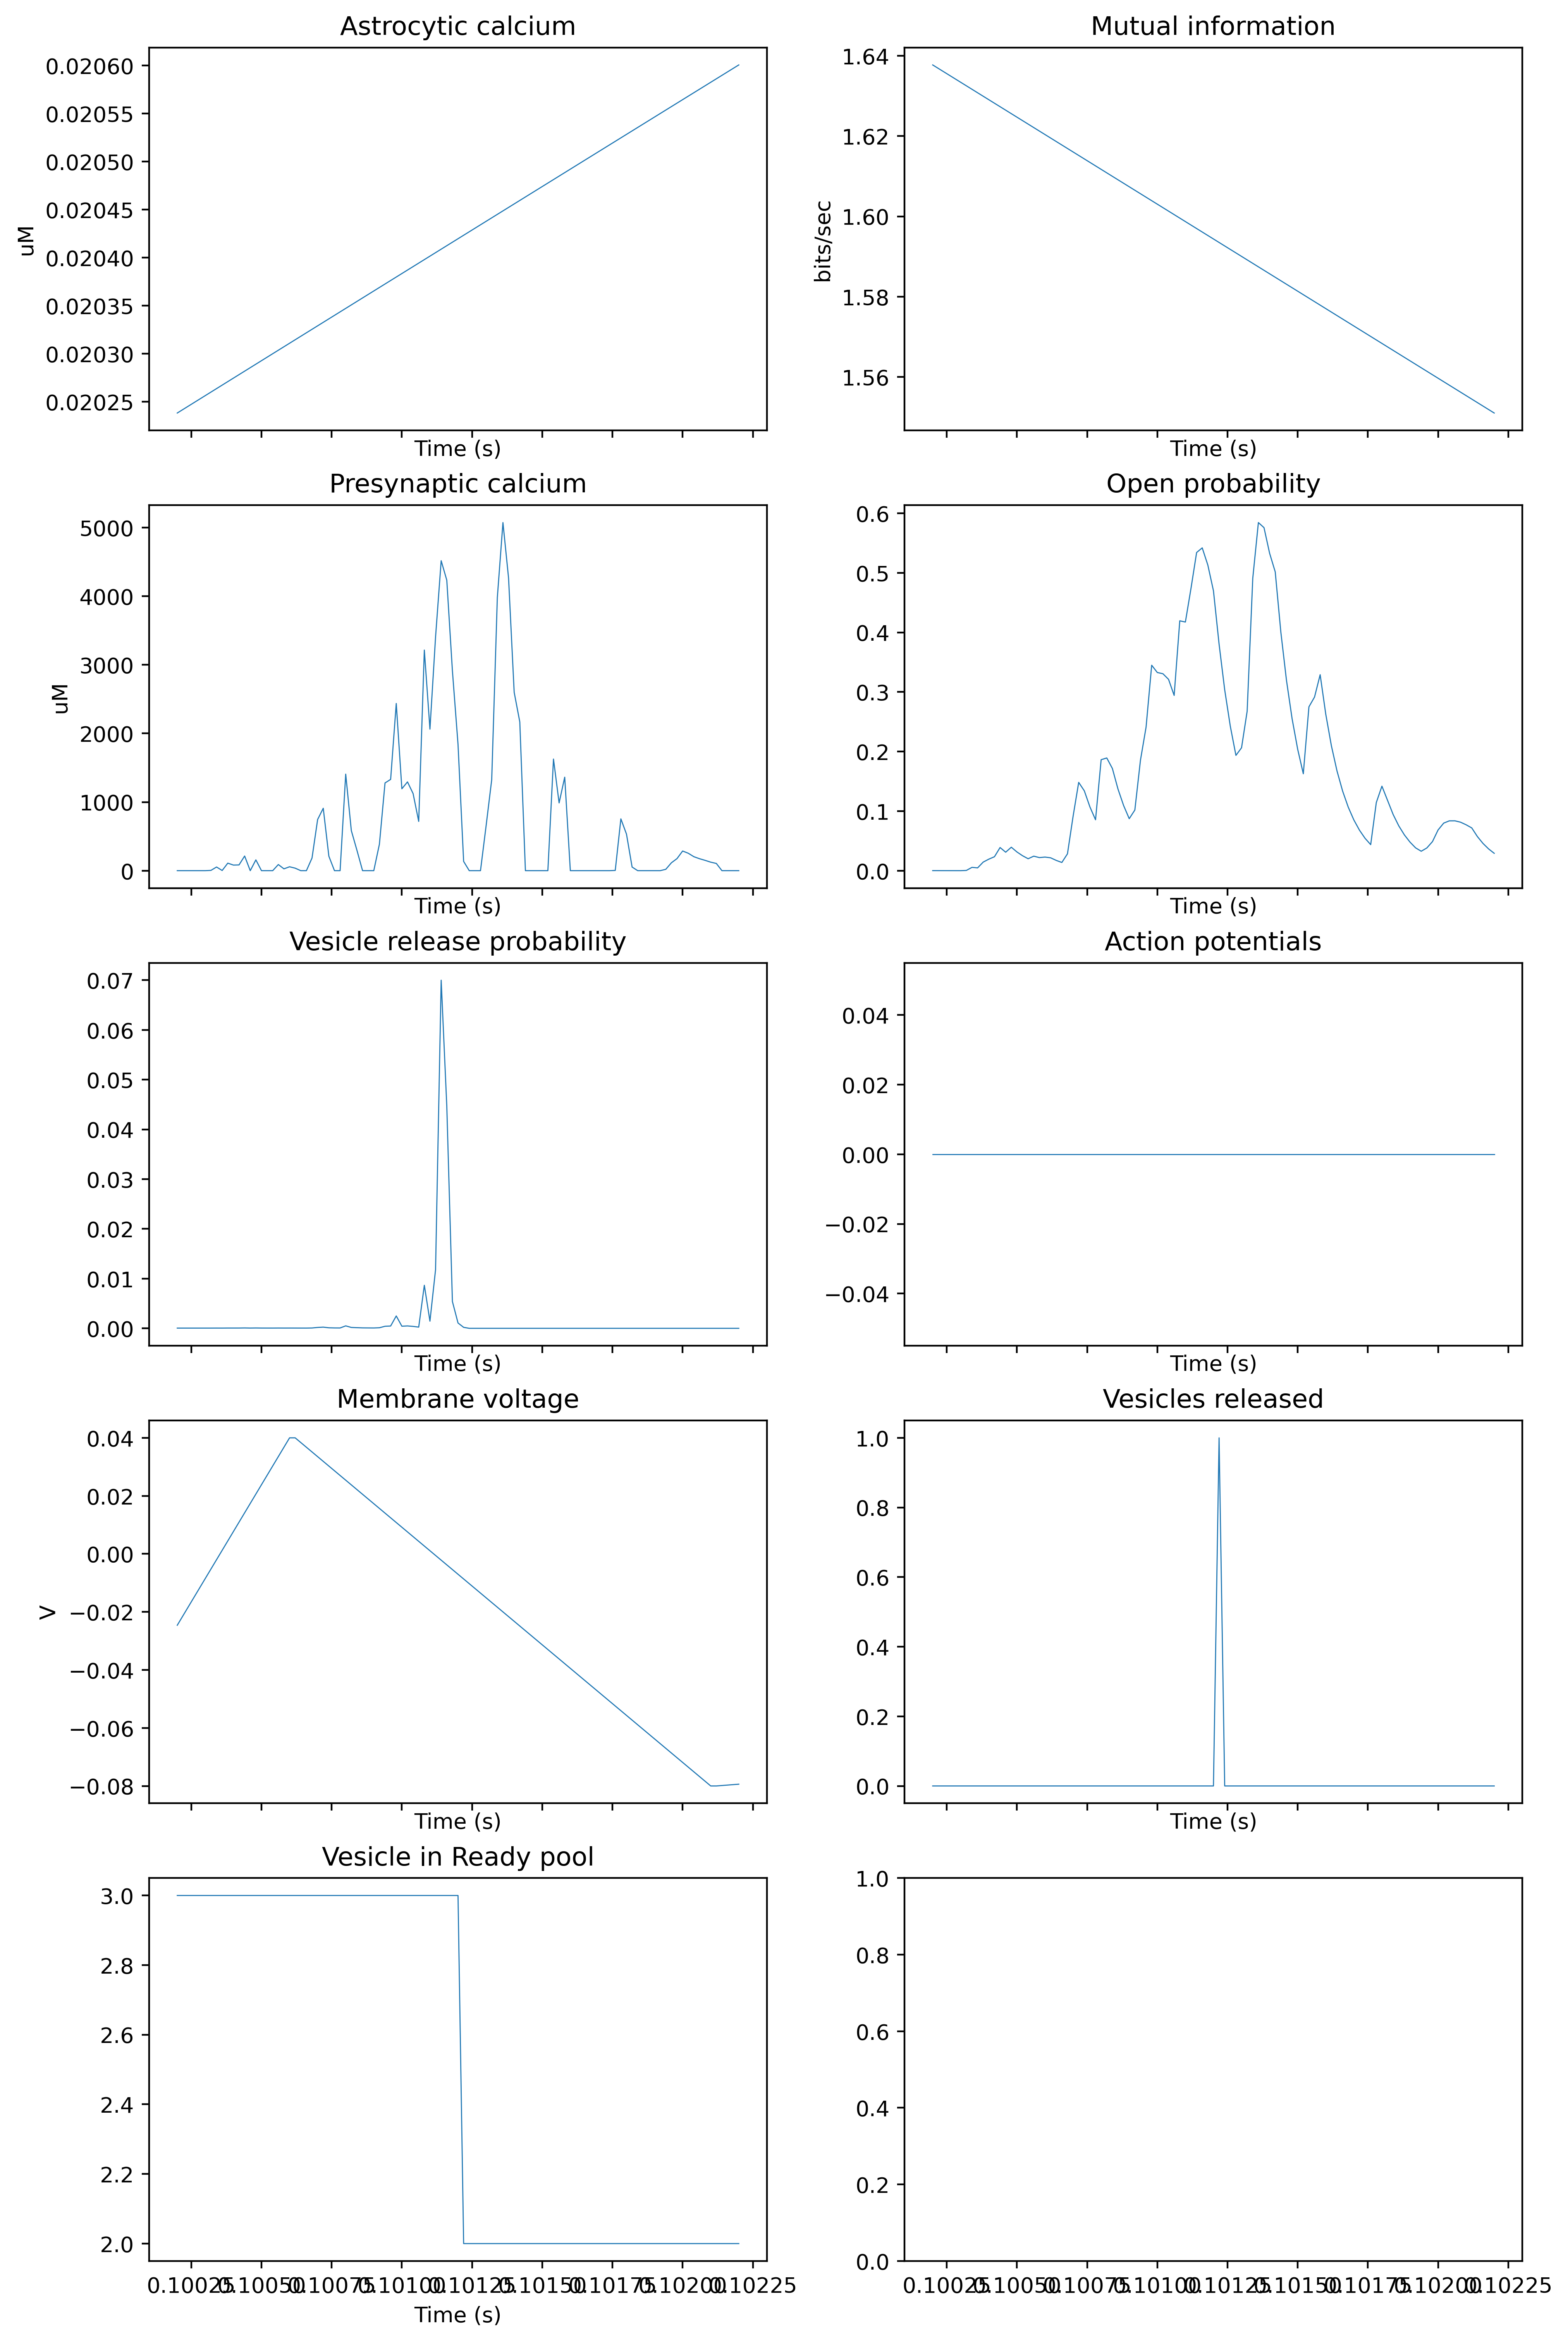

Average number of APs: 0.0 (0.0 Hz)
Average number of vesicle releases: 1.0 (500.0 Hz)
Average mutual information: 1.6103 bit/s


In [30]:
time_window_plot = 0.1002, 0.1022
myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables), time_window=time_window_plot)

#myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, aggregate, n_drawings=len(track_variables),
#                  n_plots=len(setProva), labels=labels, time_window=time_window_plot)

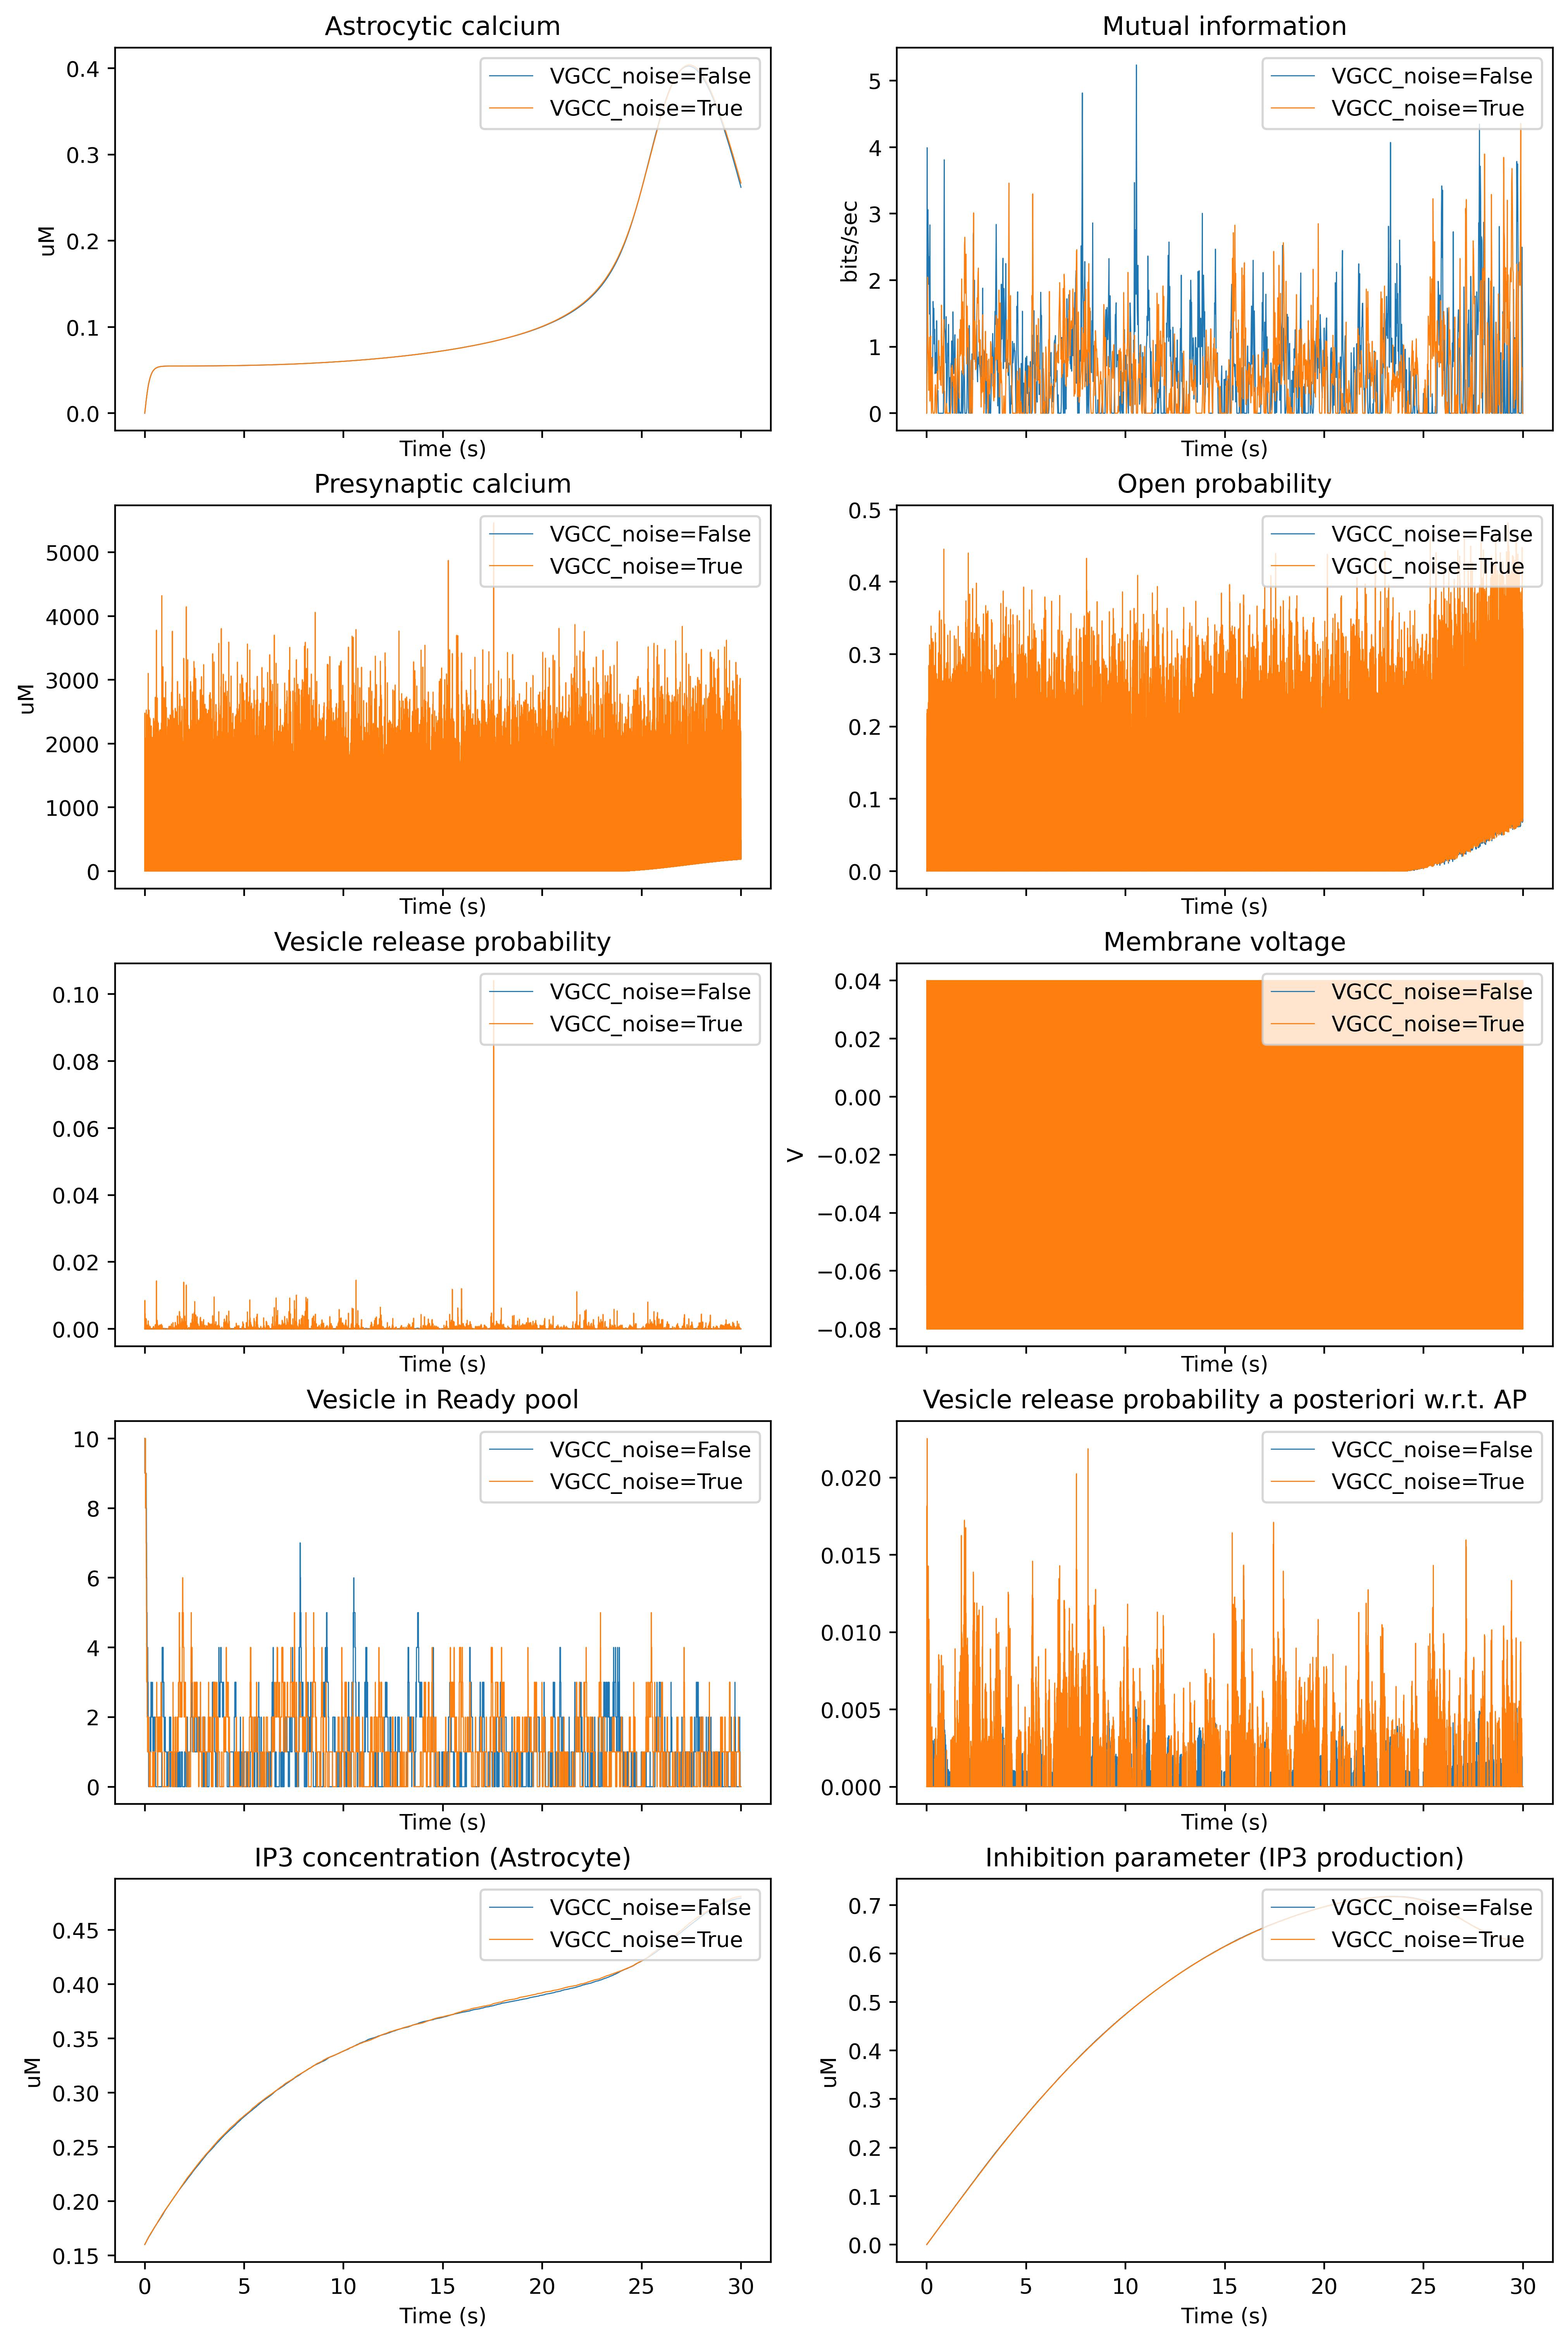

In [13]:
"""setProva = (20, 200, 500)#(2, 5, 10, 27)
aggregate = None
labels = []
for lambda_ in setProva:
    simulation_parameters.lambda_ = lambda_#properties.N_v_max = N_max
    my_neuron = neuron.Simulator(properties, simulation_parameters, noise)
    results = my_neuron.simulate(track_variables, save=True, save_each=1)
    if (aggregate == None):
        aggregate = results
    else:
        aggregate = aggregate.group(results)
    labels.append("λ=" + str(lambda_))

myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, aggregate, n_drawings=len(track_variables),
                  n_plots=len(setProva), labels=labels)

setProva = [False, True]#(2, 5, 10, 27)
aggregate = None
labels = []
for case in setProva:
    properties.STD_active = case
    my_neuron = neuron.Simulator(properties, simulation_parameters, noise)
    results = my_neuron.simulate(track_variables, save=True, save_each=1)
    if (aggregate == None):
        aggregate = results
    else:
        aggregate = aggregate.group(results)
    labels.append("STD_active=" + str(case))

myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, aggregate, n_drawings=len(track_variables),
                  n_plots=len(setProva), labels=labels)"""
setProva = [False, True]#(2, 5, 10, 27)
aggregate = None
labels = []
for case in setProva:
    noise.VGCC = case
    my_neuron = neuron.Simulator(properties, simulation_parameters, noise)
    results = my_neuron.simulate(track_variables, save=True, save_each=5)
    if (aggregate == None):
        aggregate = results
    else:
        aggregate = aggregate.group(results)
    labels.append("VGCC_noise=" + str(case))

myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, aggregate, n_drawings=len(track_variables),
                  n_plots=len(setProva), labels=labels)

In [ ]:
"""corrs = np.zeros((10, 3, 3))
for i in range(10):
    results = my_neuron.simulate(track_variables, save=False, save_each=1)
    #results.release_prob.averageEach(30000)
    #myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables))
                    #, time_window=time_window_plot)
    #myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables), time_window=time_window_plot)
    arr = np.zeros((3, results.N))
    arr[0, :] = results.open_prob.value
    arr[1, :] = results.release_prob.value
    arr[2, :] = results.ap_duration_count.value
    corrs[i, :, :] = np.corrcoef(arr)
    print(corrs[i, :, :])"""